# Экспресс-исследование надежности заемщиков

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аннотация" data-toc-modified-id="Аннотация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аннотация</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категоризация-заемщиков-по-величине-дохода-и-по-цели-взятия-кредита" data-toc-modified-id="Категоризация-заемщиков-по-величине-дохода-и-по-цели-взятия-кредита-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Категоризация заемщиков по величине дохода и по цели взятия кредита</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Зависимость-между-количеством-детей-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-количеством-детей-и-возвратом-кредита-в-срок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Зависимость между количеством детей и возвратом кредита в срок</a></span></li><li><span><a href="#Влияние-семейного-положения-на-возврат-кредита" data-toc-modified-id="Влияние-семейного-положения-на-возврат-кредита-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Влияние семейного положения на возврат кредита</a></span></li><li><span><a href="#Уровень-дохода-и-возврат-кредита-в-срок" data-toc-modified-id="Уровень-дохода-и-возврат-кредита-в-срок-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уровень дохода и возврат кредита в срок</a></span></li><li><span><a href="#Влияние-цели-взятия-кредита-на-его-возврат" data-toc-modified-id="Влияние-цели-взятия-кредита-на-его-возврат-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Влияние цели взятия кредита на его возврат</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-исходных-данных" data-toc-modified-id="Пропуски-в-исходных-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Пропуски в исходных данных</a></span></li><li><span><a href="#Демографические-факторы" data-toc-modified-id="Демографические-факторы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Демографические факторы</a></span></li><li><span><a href="#Уровень-доходов" data-toc-modified-id="Уровень-доходов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Уровень доходов</a></span></li><li><span><a href="#Цель-кредитования" data-toc-modified-id="Цель-кредитования-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Цель кредитования</a></span></li></ul></li></ul></div>

## Аннотация
**Цель.** Определить, влияет ли семейное положение, количество детей, уровень дохода и цель взятия кредита на погашение кредита в срок. Полученные результаты могут быть учтены при построении модели *кредитного скоринга*, которая оценивает платежеспособность потенциального заемщика.

**Данные:**
- `children` — количество детей в семье;
- `days_employed` — общий трудовой стаж в днях;
- `dob_years` — возраст клиента в годах;
- `education` — уровень образования клиента;
- `education_id` — идентификатор уровня образования;
- `family_status` — семейное положение;
- `family_status_id` — идентификатор семейного положения;
- `gender` — пол клиента;
- `income_type` — тип занятости;
- `debt` — имел ли задолженность по возврату кредитов;
- `total_income` — ежемесячный доход;
- `purpose` — цель получения кредита;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('future.no_silent_downcasting', True)

## Загрузка данных

In [3]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [4]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Вывод.** В двух столбцах есть пропущенные значения. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце будем медианным значением по каждому типу дохода. 

Например, у человека с типом занятости `сотрудник` пропуск `total_income` заполним медианным доходом среди всех записей с тем же типом.

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [8]:
# проверка
data['income_type'].isna().sum()

0

### Обработка аномальных значений

In [9]:
data['days_employed']

0         -8437.673028
1         -4024.803754
2         -5623.422610
3         -4124.747207
4        340266.072047
             ...      
21520     -4529.316663
21521    343937.404131
21522     -2113.346888
21523     -3112.481705
21524     -1984.507589
Name: days_employed, Length: 21525, dtype: float64

У нас есть *артефакты (аномалии)* — значения, которые не отражают действительность и появились по какой-то ошибке, например, отрицательное значение стажа заменим положительным.

In [10]:
data['days_employed'] = data['days_employed'].abs()
data['days_employed']

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64

Для каждого типа занятости посмотрим медианное значение трудового стажа

In [11]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

**Вывод.** У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, т.к. неясен источник ошибки. Возможно, 365000 дней, т.е. 1000 лет - это условное указание на то, что человек никогда не работал или, наоборот, давно на пенсии. Оставим, как есть, поскольку этот столбец не понадобится для дальнейшего исследования.

In [12]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых они встречаются

In [13]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [14]:
# проверка
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

Пропуски в столбце `days_employed` заполним медианными значениями по каждому типу занятости `income_type`

In [15]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [16]:
data['days_employed'].isna().sum()

0

### Обработка дубликатов

In [17]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Видим, что есть неявные дубликаты в столбце `education`. Приведем их к нижнему регистру

In [18]:
data['education'] = data['education'].str.lower()

Смотрим количество записей-дубликатов и удаляем их

In [19]:
data[data.duplicated() == True].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,1572.328285,41,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,покупка жилья для семьи
3290,0,365286.622650,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514.486412,сыграть свадьбу
4182,1,1572.328285,34,высшее,0,гражданский брак,1,F,сотрудник,0,142594.396847,свадьба
4851,0,365286.622650,60,среднее,1,гражданский брак,1,F,пенсионер,0,118514.486412,свадьба
5557,0,365286.622650,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514.486412,сыграть свадьбу


In [20]:
data.duplicated().sum()

71

In [21]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### Категоризация заемщиков по величине дохода и по цели взятия кредита

На основании диапазонов дохода, указанных ниже, создадим столбец `total_income_category`:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`

In [22]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [23]:
data['total_income_category'] = data['total_income'].apply(categorize_income)
data[['total_income', 'total_income_category']].head()

,total_income,total_income_category
0,253875.639453,B
1,112080.014102,C
2,145885.952297,C
3,267628.550329,B
4,158616.077870,C


Смотрим цели взятия кредита

In [24]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Сформируем новый столбец `purpose_category`, в который войдут следующие категории:
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [25]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [26]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data[['purpose', 'purpose_category']].head()

,purpose,purpose_category
0,покупка жилья,операции с недвижимостью
1,приобретение автомобиля,операции с автомобилем
2,покупка жилья,операции с недвижимостью
3,дополнительное образование,получение образования
4,сыграть свадьбу,проведение свадьбы


## Исследовательский анализ

### Зависимость между количеством детей и возвратом кредита в срок

In [27]:
# сгруппируем столбец с данными о факте задолженности 
# по количеству детей (в долях по категориям)
data.groupby('children')['debt'].value_counts(normalize=True, ascending=True)

children  debt
0         1       0.075438
          0       0.924562
1         1       0.092346
          0       0.907654
2         1       0.094542
          0       0.905458
3         1       0.081818
          0       0.918182
4         1       0.097561
          0       0.902439
5         0       1.000000
Name: proportion, dtype: float64

**Вывод:** у бездетных 7,5% невозвратов, у 1-2-детных - примерно 9,3%, у многодетных - более 8%. 

Проведем более глубокий анализ по категориям - бездетные, малодетные, многодетные.

In [28]:
# группируем по числу детей количество клиентов и количество долгов у них
temp_list = data.groupby('children', group_keys=False).agg(
    {'children':'count', 'debt':'sum'})
temp_list

,children,debt
children,,
0,14091,1063
1,4808,444
2,2052,194
3,330,27
4,41,4
5,9,0


In [29]:
# приводим к стандартному виду столбец индексов (=число детей) 
temp_list = temp_list.reset_index(drop=True)
# и переименуем столбцы в соответствии с их смыслом 
temp_list = temp_list.rename(columns={'children':'num_of_clients', 'debt':'num_of_debts'})
temp_list

,num_of_clients,num_of_debts
0,14091,1063
1,4808,444
2,2052,194
3,330,27
4,41,4
5,9,0


In [30]:
# укрупним категории - допишем в конец таблицы строки с данными о малодетных (сумма 1 и 2 строки)
temp_list.loc[len(temp_list)] = temp_list.loc[1] + temp_list.loc[2]
# и многодетных (сумма 3,4,5 строк)
temp_list.loc[len(temp_list)] = temp_list.loc[3] + temp_list.loc[4] + temp_list.loc[5]

In [31]:
# удалим из таблицы строки, ставшие ненужными
temp_list.drop([1, 2, 3, 4, 5], inplace=True)
# и допишем строку с данными о всех клиентах с детьми
temp_list.loc[len(temp_list)] = temp_list.loc[6] + temp_list.loc[7]
temp_list

,num_of_clients,num_of_debts
0,14091,1063
6,6860,638
7,380,31
3,7240,669


In [32]:
# добавим столбец с краткими именами новых категорий
temp_list['children_id'] = ['no_child', 'one_or_two', 'large', 'with_kids']
# обновим индексы 
temp_list = temp_list.reset_index(drop=True)
temp_list

,num_of_clients,num_of_debts,children_id
0,14091,1063,no_child
1,6860,638,one_or_two
2,380,31,large
3,7240,669,with_kids


In [33]:
# добавим столбец со значениями долей должников по категориям
temp_list['debt_rate'] = temp_list['num_of_debts'] / temp_list['num_of_clients']
temp_list

,num_of_clients,num_of_debts,children_id,debt_rate
0,14091,1063,no_child,0.075438
1,6860,638,one_or_two,0.093003
2,380,31,large,0.081579
3,7240,669,with_kids,0.092403


Выводы, сделанные выше, подтверждаются и для новых укрупненных категорий. Посмотрим, на сколько процентов  клиенты с детьми "менее надежны":

In [34]:
# в новый столбец запишем для всех категорий относительное отклонение
# доли невозврата по сравнению с бездетными клиентами 
temp_list['relat_to_no_child_dif_rate'] = 0
for i in [1, 2, 3]:
    temp_list.loc[i, 'relat_to_no_child_dif_rate'] = \
    temp_list.loc[i, 'debt_rate'] / temp_list.loc[0, 'debt_rate'] - 1
temp_list

C:\Users\kuche\AppData\Local\Temp\ipykernel_31180\534985330.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2328354483844337' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temp_list.loc[i, 'relat_to_no_child_dif_rate'] = \


,num_of_clients,num_of_debts,children_id,debt_rate,relat_to_no_child_dif_rate
0,14091,1063,no_child,0.075438,0.000000
1,6860,638,one_or_two,0.093003,0.232835
2,380,31,large,0.081579,0.081401
3,7240,669,with_kids,0.092403,0.224887


**Вывод.** По сравнению с бездетными, клиенты с детьми на 22,5% чаще не возвращают кредит в срок (точнее - малодетные на 23,3% чаще, многодетные - на 8,1% чаще).

Построим еще столбчатые диаграммы для числа клиентов и числа должников среди них:

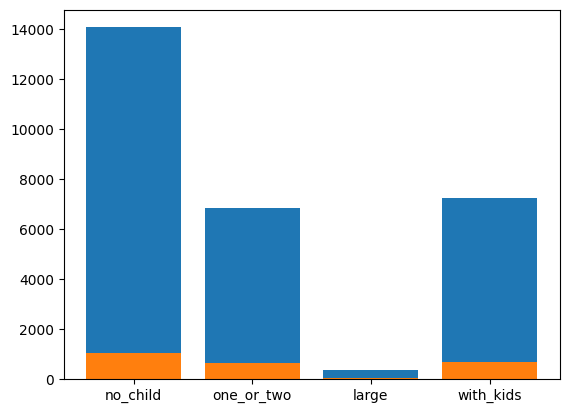

In [35]:
plt.bar(temp_list['children_id'], temp_list['num_of_clients'])
plt.bar(temp_list['children_id'], temp_list['num_of_debts'])
plt.show()

**Вывод:** Зависимость между количеством детей и возвратом кредита в срок есть.

А именно, 7,5% бездетных клиентов не возвращают кредит в срок и 9,2% клиентов с детьми не возвращают кредит в срок, что на 22,5% чаще (точнее - малодетные на 23,3% чаще, многодетные - на 8,1% чаще). Вероятно, клиенты с детьми несут больше расходов по сравнению с бездетными, что чаще приводит к просрочкам по кредиту. При этом многодетные более платежеспособны по сравнению с малодетными, что может быть связано с дополнительной поддержкой, которую они получают от государства. 

Однако частотная диаграмма ясно показывает, что процент должников относительно невелик (менее 10%) во всех категориях клиентов, при этом общее число многодетных даже меньше, чем число должников среди бездетных или малодетных. Результат требует дальнейшей проверки на статистическую значимость (в рамках данного экспресс-исследования - неактуально)

### Влияние семейного положения на возврат кредита

In [36]:
# как и в предыдущем пункте, оценим доли должников среди клиентов с разным семейным статусом 
data.groupby('family_status')['debt'].value_counts(normalize=True, ascending=True)


family_status          debt
Не женат / не замужем  1       0.097639
                       0       0.902361
в разводе              1       0.070648
                       0       0.929352
вдовец / вдова         1       0.066246
                       0       0.933754
гражданский брак       1       0.093130
                       0       0.906870
женат / замужем        1       0.075606
                       0       0.924394
Name: proportion, dtype: float64

**Вывод:** среди клиентов, не находящихся в официальном браке (*Не женат / не замужем / гражданский брак*) процент должников выше и составляет 9,3-9,8%, тогда как у остальных категорий процент должников 7-7,5%. 

Проверим факторы, которые могут влиять на невозвращение кредита в срок у клиентов, не находящихся в официальном браке: 
- более молодой возраст; 
- более низкий доход; 
- наличие детей, которых растят в одиночку; 
- пол (предположим, женщины не в браке чаще становятся должниками).

(Эти гипотезы также требуют проверки статистической значимости, что выходит за рамки экспресс-исследования)

In [37]:
data.groupby(['family_status', 'debt'])[['dob_years', 'total_income']].agg('median')

dob_years   total_income
family_status         debt                          
Не женат / не замужем 0          36.0  142594.396847
                      1          32.0  147013.142600
в разводе             0          46.0  144546.428029
                      1          44.0  142560.820817
вдовец / вдова        0          58.0  126507.323063
                      1          57.0  140683.362762
гражданский брак      0          41.0  142594.396847
                      1          38.0  142594.396847
женат / замужем       0          43.0  143296.091502
                      1          39.0  142594.396847

Как видим, у не состоящих в официальном браке и имеющих просрочки по платежам медианный возраст (32 года) действительно значительно ниже, чем у всех остальных категорий. При этом медианный доход у таких клиентов, наоборот, выше, чем у остальных. 

Учитывая обнаруженный выше больший процент должников среди данной категории, можно предполагать, что более высокий ежемесячный доход у них получился как раз за счет большего числа взятых кредитов.   

При этом тенденция "меньше возраст - есть просрчки по кредитам" наблюдается у всех категорий.

In [38]:
# таблица с частотами семейного статуса
df_fam_stat = data['family_status'].value_counts().reset_index()
df_fam_stat = df_fam_stat.rename(columns={'num_of_clients':'family_status'})
# общее число клиентов
n = df_fam_stat['count'].sum()
print(n)
df_fam_stat

21331


,family_status,count
0,женат / замужем,12261
1,гражданский брак,4134
2,Не женат / не замужем,2796
3,в разводе,1189
4,вдовец / вдова,951


In [39]:
# функция нужна для отнесения к категории "нет детей"
def iszero(x):
    if x == 0:
        return 0
    else:
        return 1
    
# создание столбца с 0 или 1 в зависимости от наличия детей
data['with_kids'] = data['children'].apply(iszero)
# определение частот данного подстатуса
df1 = data.groupby(['family_status', 'debt'])['with_kids'].agg(substatus_count='value_counts').reset_index()
# присоединение таблицы с частотами семейного статуса                                                  
df1 = df1.merge(df_fam_stat)
# вычисление долей подстатусов внутри статуса
df1['substatus_rate'] = df1['substatus_count'] / df1['count']
# вычисление долей подстатусов относительно всего датасета
df1['total_rate'] = df1['substatus_count'] / n
# вывод части полученной таблицы с данными только о клиентах-должниках
df1[df1['debt'] == 1]

,family_status,debt,with_kids,substatus_count,count,substatus_rate,total_rate
2,Не женат / не замужем,1,0,210,2796,0.075107,0.009845
3,Не женат / не замужем,1,1,63,2796,0.022532,0.002953
6,в разводе,1,0,55,1189,0.046257,0.002578
7,в разводе,1,1,29,1189,0.024390,0.001360
10,вдовец / вдова,1,0,53,951,0.055731,0.002485
11,вдовец / вдова,1,1,10,951,0.010515,0.000469
14,гражданский брак,1,0,229,4134,0.055394,0.010736
15,гражданский брак,1,1,156,4134,0.037736,0.007313
18,женат / замужем,1,0,516,12261,0.042085,0.024190
19,женат / замужем,1,1,411,12261,0.033521,0.019268


Видно, что бездетные клиенты среди не состоящих в браке имеют более высокие относительные частоты (substatus_rate) 7,5% и 5,5%, что можно интерпретировать как более высокий персональный  риск для данной категории. 

Полученные данные также позволяют оценить значимость всех категорий для банка (параметр total_rate). Состоящих в официальном браке клиентов с долгами в целом больше.

In [40]:
# проверка данных о поле клиентов
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [41]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,with_kids
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости,B,операции с недвижимостью,0


In [42]:
# удаление строки с аномальным значением
data.drop([10701], inplace=True)
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [43]:
# создание таблицы с данными о распределении долгов по семейному статусу и половой принадлежности
df2 = data.groupby(['family_status', 'debt'])['gender'].agg(gender_count='value_counts').reset_index()
# присоединение таблицы с частотами семейного статуса                                                  
df2 = df2.merge(df_fam_stat)
# вычисление долей лиц обоего пола внутри каждого семейного статуса
df2['gender_rate'] = df2['gender_count'] / df2['count']
# вычисление долей лиц обоего пола относительно всего датасета 
df2['total_rate'] = df2['gender_count'] / (n - 1)
# вывод части получой таблицы с данными только о клиентах-должниках-женщинах
df2[(df2['debt'] == 1) & (df2['gender'] == 'F')]

,family_status,debt,gender,gender_count,count,gender_rate,total_rate
3,Не женат / не замужем,1,F,118,2796,0.042203,0.005532
6,в разводе,1,F,61,1189,0.051304,0.002860
10,вдовец / вдова,1,F,52,951,0.054679,0.002438
14,гражданский брак,1,F,232,4134,0.056120,0.010877
18,женат / замужем,1,F,526,12261,0.042900,0.024660


Видно, что семейный статус женщин не оказывает заметного влияния на невозврат кредита в срок. При этом число замужних или живущих в гражданском браке женщин-должников среди клиентов банка выше.

**Вывод:** Зависимость между семейным положением и возвратом кредита в срок есть.

А именно, среди клиентов, не находящихся в официальном браке (*Не женат / не замужем / гражданский брак*) процент должников выше и составляет 9,3-9,8%, тогда как у остальных категорий процент должников 7-7,5%.

Факторы, которые могут быть связаны с невозвращением кредита в срок у клиентов, не находящихся в официальном браке: более молодой  возраст (младше 32 лет), большее количество кредитов, отсутствие детей.

(Как и в предыдущем пункте, вывод также требует проверки статистической значимости).

### Уровень дохода и возврат кредита в срок

В этом и следующем пунктах ограничимся наиболее кратким анализом

In [44]:
# таблица с данными о количестве клиентов с отсутствием/наличием невозвратов по категориям дохода
temp1 = data.groupby('total_income_category')['debt'].agg(num_of_clients='value_counts').reset_index()
temp1

,total_income_category,debt,num_of_clients
0,A,0,23
1,A,1,2
2,B,0,4659
3,B,1,354
4,C,0,14568
5,C,1,1353
6,D,0,328
7,D,1,21
8,E,0,20
9,E,1,2


In [45]:
# сводная таблица со столбцами, содержащими данные о клиентах с отсутствием/наличием невозвратов
temp2 = pd.pivot_table(temp1, values='num_of_clients', index='total_income_category', columns='debt').reset_index()
temp2

debt,total_income_category,0,1
0,A,23.0,2.0
1,B,4659.0,354.0
2,C,14568.0,1353.0
3,D,328.0,21.0
4,E,20.0,2.0


In [46]:
df3 = temp2.rename(columns={0:'no_debt', 1:'with_debt'})
df3

debt,total_income_category,no_debt,with_debt
0,A,23.0,2.0
1,B,4659.0,354.0
2,C,14568.0,1353.0
3,D,328.0,21.0
4,E,20.0,2.0


In [47]:
# переименуем столбцы
df3 = temp2.rename(columns={0:'no_debt', 1:'with_debt'})
# добавим столбец с общим числом клиентов по категориям дохода
df3['num_of_clients'] = df3[['no_debt', 'with_debt']].sum(axis=1)
df3

debt,total_income_category,no_debt,with_debt,num_of_clients
0,A,23.0,2.0,25.0
1,B,4659.0,354.0,5013.0
2,C,14568.0,1353.0,15921.0
3,D,328.0,21.0,349.0
4,E,20.0,2.0,22.0


In [48]:
# общее количество невозвратов
n_debt = df3['with_debt'].sum()
# общее количество клиентов
n = df3['no_debt'].sum() + n_debt
# создаем столбец с долями категорий от общего числа клиентов
df3['income_category_rate'] = df3['num_of_clients'] / n
# создаем столбец с долями невозвратов внутри категорий
df3['debt_rate_in_income_category'] = df3['with_debt'] / df3['num_of_clients']
# и столбец с долями невозвратов от общего числа невозвратов
df3['total_debt_rate'] = df3['with_debt'] / n_debt
df3

debt,total_income_category,no_debt,with_debt,num_of_clients,income_category_rate,debt_rate_in_income_category,total_debt_rate
0,A,23.0,2.0,25.0,0.001172,0.080000,0.001155
1,B,4659.0,354.0,5013.0,0.235021,0.070616,0.204388
2,C,14568.0,1353.0,15921.0,0.746414,0.084982,0.781178
3,D,328.0,21.0,349.0,0.016362,0.060172,0.012125
4,E,20.0,2.0,22.0,0.001031,0.090909,0.001155


**Вывод:** На категории С (доход от 50 до 200 тыс) и В (доход от 200 тыс до 1 млн) приходится более 98% клиентов банка (столбец `income_category_rate`). Эти категории также дали 98,5% всех невозвратов, а именно: С - 78,1%, В - 20,4% (столбец `total_debt_rate`). Поэтому включать в анализ категории A, D, E некорректно (слишком мало было таких клиентов).

Внутри двух основных категорий процент невозвратов следующий: С - 8,5%, В - 7,1% (столбец `debt_rate_in_income_category`). Итак, можно заключить, что у более состоятельных клиентов меньше проблем с возвратом кредита в срок.

### Влияние цели взятия кредита на его возврат

In [49]:
# доли невозвратов среди целевых категорий
data.groupby('purpose_category')['debt'].value_counts(normalize=True, ascending=True)

purpose_category          debt
операции с автомобилем    1       0.093480
                          0       0.906520
операции с недвижимостью  1       0.072558
                          0       0.927442
получение образования     1       0.092528
                          0       0.907472
проведение свадьбы        1       0.079118
                          0       0.920882
Name: proportion, dtype: float64

In [50]:
# абсолютные значения
data.groupby('purpose_category')['debt'].agg('value_counts')

purpose_category          debt
операции с автомобилем    0       3879
                          1        400
операции с недвижимостью  0       9970
                          1        780
получение образования     0       3619
                          1        369
проведение свадьбы        0       2130
                          1        183
Name: count, dtype: int64

**Вывод:** Разные цели кредита влияют на его возврат в срок: чаще бывают задержки по кредитам, связанным с приобретением автомобиля и получением образования (по 9,3% случаев в каждой категории). При этом самая популярная цель - операции с недвижимостью, и по ней меньше всего должников (7,3%).

## Общий вывод

### Пропуски в исходных данных

Пропуски с столбце со стажем могут быть у безработных или пенсионеров. Сведения о ежемесячном доходе могли вовремя не обновится или клиенты их умышленно скрыли.

Наибольшие и наименьшие значения могут сильно отличаться от среднего (выбросы) и вносить значительный вклад при его подсчете как среднего арифметического. Поэтому пропуски заполняли категориальными медианами.

### Демографические факторы
- 7,5% бездетных клиентов не возвращают кредит в срок и 9,2% клиентов с детьми не возвращают кредит в срок. Вероятно, клиенты с детьми несут больше расходов по сравнению с бездетными, что чаще приводит к просрочкам по кредиту. 
- среди клиентов, не находящихся в официальном браке (не женат/не замужем/гражданский брак) процент должников выше и составляет 9,3-9,8%, тогда как у остальных категорий процент должников 7-7,5%. Факторы, которые могут быть связаны с невозвращением кредита в срок у этих клиентов: более молодой возраст (младше 32 лет), большее количество кредитов, отсутствие детей.

### Уровень доходов
8,5% клиентов категории С (доход от 50 до 200 тыс) не возвращали кредит в срок, тогда как у клиентов категории В (доход от 200 тыс до 1 млн) процент невозвратов был ниже - 7,1%. Таким образом, у более состоятельных клиентов меньше проблем с возвратом кредита в срок. Провести корректный анализ категорий клиентов A, D, E нельзя (слишком мало таких клиентов в выборке).

### Цель кредитования
Цели взятия кредита влияют на его возврат в срок: чаще бывают задержки по кредитам, связанным с приобретением автомобиля и получением образования (по 9,3% случаев в каждой категории). При этом самая популярная цель - операции с недвижимостью, и по ней меньше всего просрочек (7,3%).